# Import libraries and upload dataset

In [2]:
import pandas as pd
import numpy as np
import re
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("fraudTest.csv")

# Preprocessing and cleaning data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# Mapping of current column names to new names
rename_mapping = {
    'Unnamed: 0': 'Index',
    'trans_date_trans_time': 'Transaction_DateTime',
    'cc_num': 'Credit_Card_Number',
    'merchant': 'Merchant',
    'category': 'Transaction_Category',
    'amt': 'Amount',
    'first': 'First_Name',
    'last': 'Last_Name',
    'gender': 'Gender',
    'street': 'Street',
    'city': 'City',
    'state': 'State',
    'zip': 'Zip',
    'lat': 'Latitude',
    'long': 'Longitude',
    'city_pop': 'City_Population',
    'job': 'Job',
    'dob': 'Date_of_Birth',
    'trans_num': 'Transaction_Number',
    'unix_time': 'Unix_Timestamp',
    'merch_lat': 'Merchant_Latitude',
    'merch_long': 'Merchant_Longitude',
    'is_fraud': 'Fraud_Indicator'
}

# Rename columns using the mapping
df.rename(columns=rename_mapping, inplace=True)
    
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')


In [6]:
# Handle missing values (if any)
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Index                   0
Transaction_DateTime    0
Credit_Card_Number      0
Merchant                0
Transaction_Category    0
Amount                  0
First_Name              0
Last_Name               0
Gender                  0
Street                  0
City                    0
State                   0
Zip                     0
Latitude                0
Longitude               0
City_Population         0
Job                     0
Date_of_Birth           0
Transaction_Number      0
Unix_Timestamp          0
Merchant_Latitude       0
Merchant_Longitude      0
Fraud_Indicator         0
dtype: int64


In [7]:
# Handle duplicate data
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 0


In [8]:

# Convert Transaction_DateTime and Date of birth to datetime
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_DateTime'])
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Index                 555719 non-null  int64         
 1   Transaction_DateTime  555719 non-null  datetime64[ns]
 2   Credit_Card_Number    555719 non-null  int64         
 3   Merchant              555719 non-null  object        
 4   Transaction_Category  555719 non-null  object        
 5   Amount                555719 non-null  float64       
 6   First_Name            555719 non-null  object        
 7   Last_Name             555719 non-null  object        
 8   Gender                555719 non-null  object        
 9   Street                555719 non-null  object        
 10  City                  555719 non-null  object        
 11  State                 555719 non-null  object        
 12  Zip                   555719 non-null  int64         
 13 

In [10]:
# Calculate z-scores for each numeric column
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Define threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Boolean array indicating outliers
outlier_mask = (abs(z_scores) > threshold).any(axis=1)

# Filter rows without outliers
cleaned_df = df[~outlier_mask]

# Display cleaned dataset
print("Cleaned Dataset without outliers:")
cleaned_df.head()


Cleaned Dataset without outliers:


,Index,Transaction_DateTime,Credit_Card_Number,Merchant,Transaction_Category,Amount,First_Name,Last_Name,Gender,Street,...,Latitude,Longitude,City_Population,Job,Date_of_Birth,Transaction_Number,Unix_Timestamp,Merchant_Latitude,Merchant_Longitude,Fraud_Indicator
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [11]:
# Check for inconsistencies in numeric columns
# Define valid ranges for latitude and longitude
valid_latitude_range = (-90, 90)
valid_longitude_range = (-180, 180)

# Function to clean latitude and longitude columns
def clean_lat_long(value, valid_range):
    try:
        numeric_value = float(value)
        if valid_range[0] <= numeric_value <= valid_range[1]:
            return numeric_value
        else:
            return np.nan
    except ValueError:
        return np.nan

# Clean Latitude column
df['Latitude'] = df['Latitude'].apply(lambda x: clean_lat_long(x, valid_latitude_range))

# Clean Longitude column
df['Longitude'] = df['Longitude'].apply(lambda x: clean_lat_long(x, valid_longitude_range))

# Use cleaned_df instead of df for the cleaned DataFrame
cleaned_df = df.copy()

# Print cleaned DataFrame
cleaned_df

,Index,Transaction_DateTime,Credit_Card_Number,Merchant,Transaction_Category,Amount,First_Name,Last_Name,Gender,Street,...,Latitude,Longitude,City_Population,Job,Date_of_Birth,Transaction_Number,Unix_Timestamp,Merchant_Latitude,Merchant_Longitude,Fraud_Indicator
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [12]:
# Function to clean city population column
def clean_city_population(value):
    try:
        return int(value)  # Assuming population is numeric
    except ValueError:
        return np.nan

# Clean City and City Population columns
df['City_Population'] = df['City_Population'].apply(clean_city_population)

# Function to clean city names (example: converting to title case)
def clean_city_name(city):
    try:
        return city.title()  # Convert to title case
    except AttributeError:
        return np.nan

# Clean City column
df['City'] = df['City'].apply(clean_city_name)

# Function to clean other columns if needed
# Example: cleaning 'Other_Column'
# df['Other_Column'] = df['Other_Column'].apply(clean_function)

# Use cleaned_df instead of df for the cleaned DataFrame
cleaned_df = df.copy()

# Print cleaned DataFrame
cleaned_df

,Index,Transaction_DateTime,Credit_Card_Number,Merchant,Transaction_Category,Amount,First_Name,Last_Name,Gender,Street,...,Latitude,Longitude,City_Population,Job,Date_of_Birth,Transaction_Number,Unix_Timestamp,Merchant_Latitude,Merchant_Longitude,Fraud_Indicator
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [13]:
# Round figure values
numeric_cols = ['Amount', 'Latitude', 'Longitude', 'Merchant_Latitude', 'Merchant_Longitude']
cleaned_df.loc[:, numeric_cols] = cleaned_df[numeric_cols].applymap(lambda x: round(x, 2))

# Print cleaned and rounded dataset
cleaned_df.head()

,Index,Transaction_DateTime,Credit_Card_Number,Merchant,Transaction_Category,Amount,First_Name,Last_Name,Gender,Street,...,Latitude,Longitude,City_Population,Job,Date_of_Birth,Transaction_Number,Unix_Timestamp,Merchant_Latitude,Merchant_Longitude,Fraud_Indicator
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.97,-80.94,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.32,-110.44,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.67,-73.54,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.57,-80.82,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.25,-85.02,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0


In [41]:
# hot encode
# Create DataFrame
cleaned_df = pd.DataFrame(df)

# Label encoding for 'Gender' column and remove the original 'Gender' column
cleaned_df = cleaned_df.assign(gender_encoded=cleaned_df['Gender'].map({'M': 0, 'F': 1})).drop(columns=['Gender'])

# Print the DataFrame to verify
cleaned_df.head()



,Index,Transaction_DateTime,Credit_Card_Number,Merchant,Transaction_Category,Amount,First_Name,Last_Name,Street,City,...,Transaction_Number,Unix_Timestamp,Merchant_Latitude,Merchant_Longitude,Fraud_Indicator,Day_of_Week,Day_Type,Year,Hour,gender_encoded
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,351 Darlene Green,Columbia,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,6,Weekend,2020,12,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,3638 Marsh Union,Altonah,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,6,Weekend,2020,12,1
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,9333 Valentine Point,Bellmore,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,6,Weekend,2020,12,1
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,32941 Krystal Mill Apt. 552,Titusville,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,6,Weekend,2020,12,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,5783 Evan Roads Apt. 465,Falmouth,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,6,Weekend,2020,12,0


## Data visulisation

### 1. Which cities top the list for fraudulent transactions?

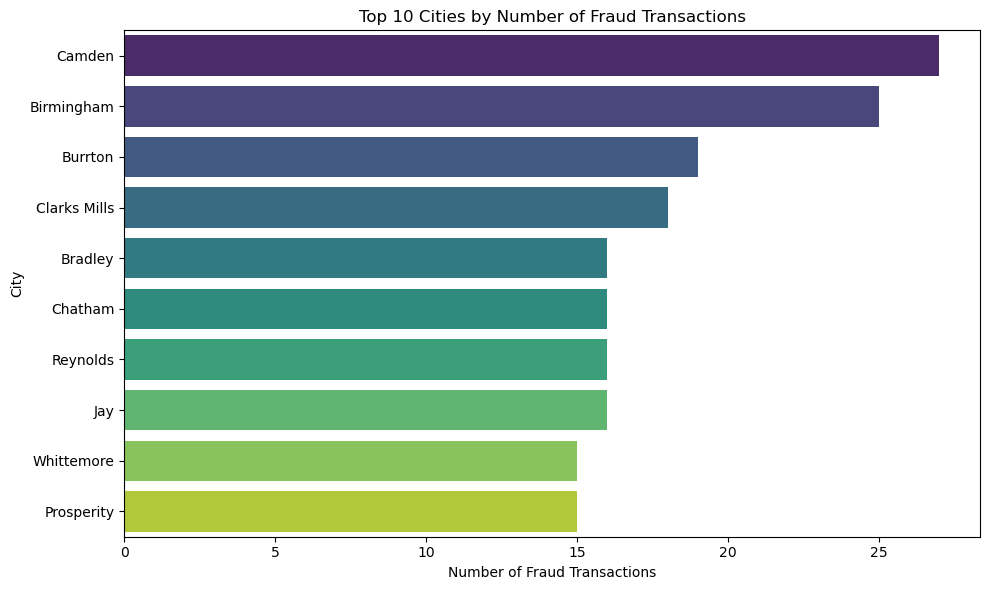

In [15]:
# Filter for fraud transactions
fraud_df = cleaned_df[cleaned_df['Fraud_Indicator'] == 1]

# Aggregate fraud transactions by city
fraud_city_counts = fraud_df['City'].value_counts().reset_index()
fraud_city_counts.columns = ['City', 'Number of Fraud Transactions']

# Select top 10 cities by fraud transaction count for visualization
top_cities = fraud_city_counts.head(10)

# Plotting the distribution of fraud transactions by city
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Fraud Transactions', y='City', data=top_cities, palette='viridis')
plt.xlabel('Number of Fraud Transactions')
plt.ylabel('City')
plt.title('Top 10 Cities by Number of Fraud Transactions')
plt.tight_layout()
plt.show()

### 2. What are the correlations between the numerical variables in the dataset?

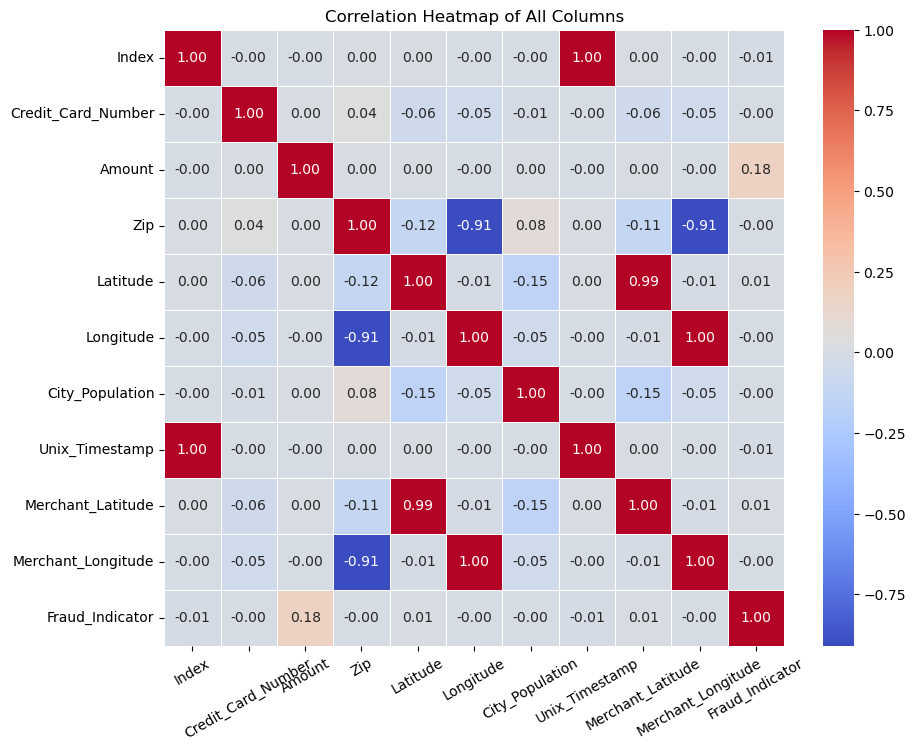

In [17]:
correlation_matrix = df.corr(numeric_only=True)

# Print the correlation matrix
correlation_matrix

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Columns')

# Rotate the x-axis labels
plt.xticks(rotation=30)
plt.yticks(rotation=0)  # Ensure y-axis labels remain horizontal

plt.show()

### 3. How does the average transaction amount vary across different transaction categories?

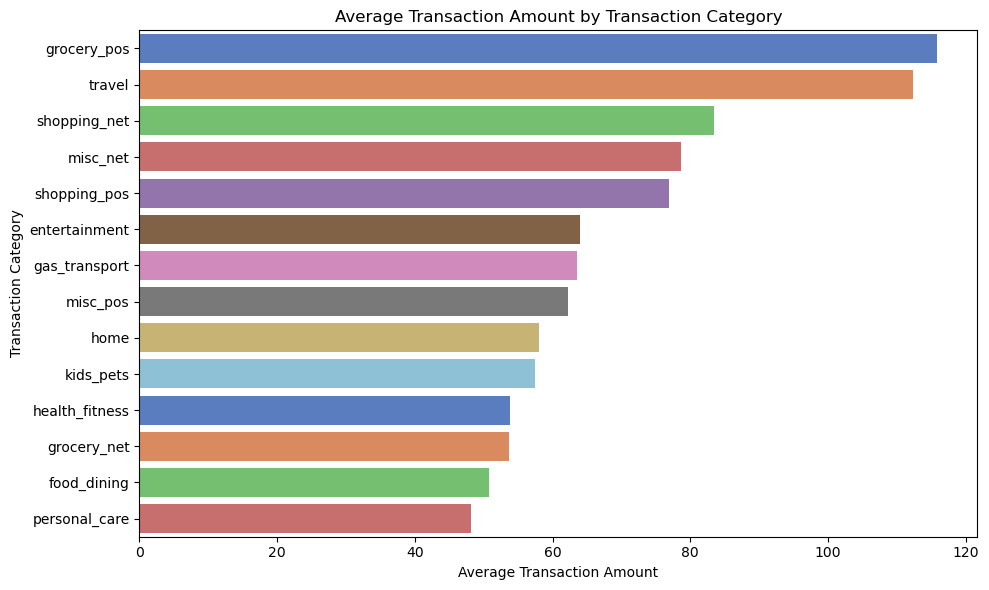

In [19]:
# Aggregate data by transaction category to get average transaction amount
avg_amount_by_category = cleaned_df.groupby('Transaction_Category')['Amount'].mean().reset_index()

# Sort by average amount in descending order for better visualization
avg_amount_by_category = avg_amount_by_category.sort_values(by='Amount', ascending=False)

# Plotting the average transaction amount by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Transaction_Category', data=avg_amount_by_category, palette='muted')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Transaction Category')
plt.title('Average Transaction Amount by Transaction Category')
plt.tight_layout()
plt.show()


### 4. How does the transaction volume change over time (e.g., by month or year)?

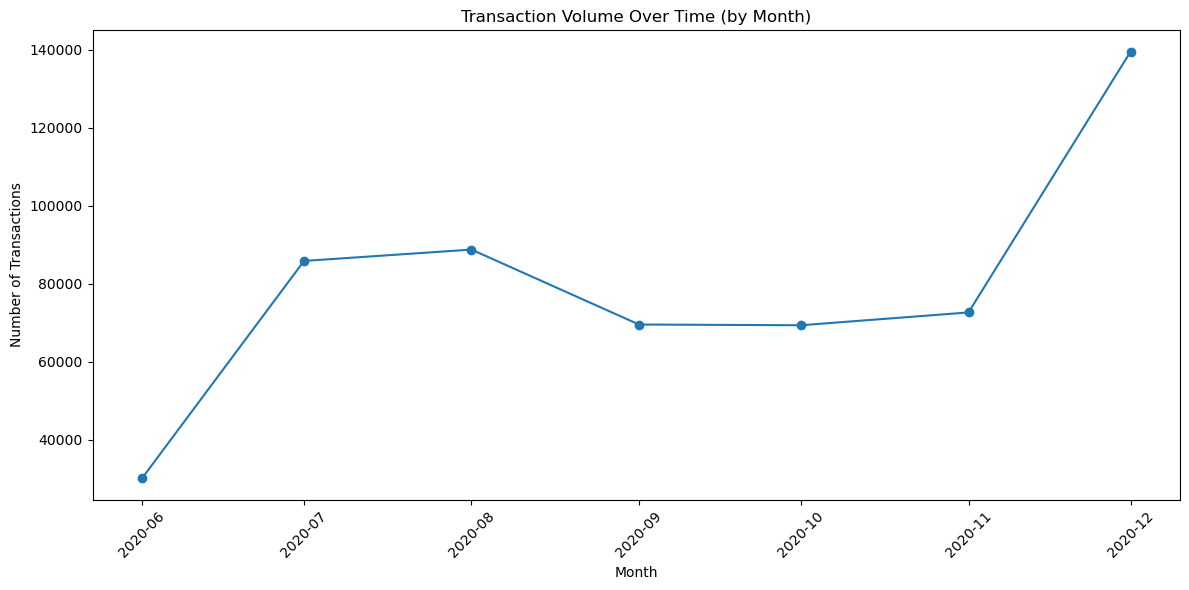

In [21]:
# Assuming 'Transaction_DateTime' column is already in datetime format
cleaned_df['Transaction_DateTime'] = pd.to_datetime(cleaned_df['Transaction_DateTime'])

# Extract month and year from the transaction datetime
cleaned_df['YearMonth'] = cleaned_df['Transaction_DateTime'].dt.to_period('M')

# Aggregate the number of transactions per month
monthly_transactions = cleaned_df['YearMonth'].value_counts().sort_index()

# Convert PeriodIndex to datetime for plotting
monthly_transactions.index = monthly_transactions.index.to_timestamp()

# Plot the transaction volume over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions.index, monthly_transactions.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume Over Time (by Month)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. What are the top five merchants by the number of transactions?

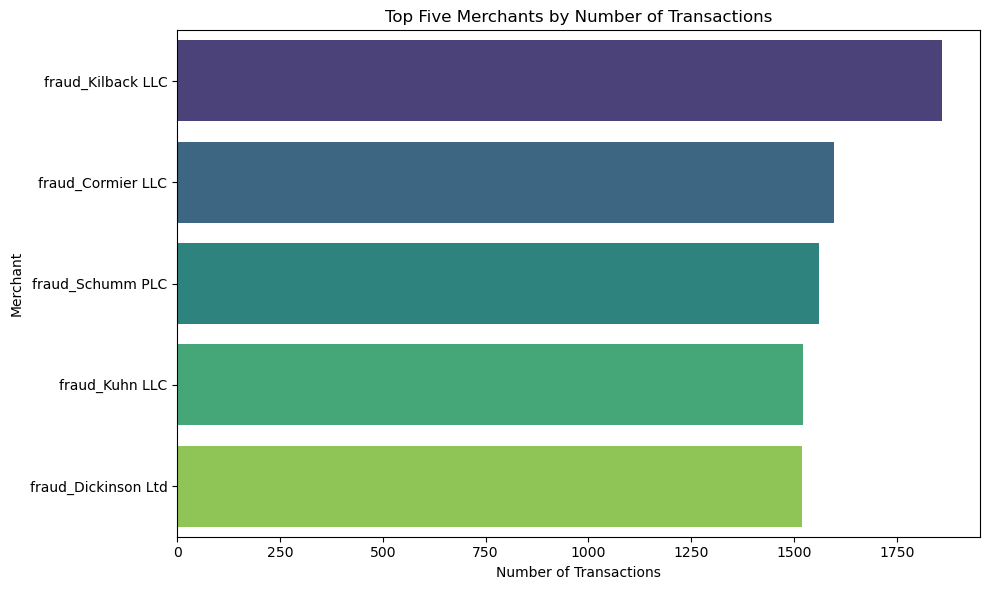

In [22]:
# Aggregate transactions by merchant
merchant_counts = cleaned_df['Merchant'].value_counts().reset_index()
merchant_counts.columns = ['Merchant', 'Number of Transactions']

# Select top five merchants by transaction count
top_merchants = merchant_counts.head(5)

# Plotting the distribution of transactions by merchant
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Transactions', y='Merchant', data=top_merchants, palette='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant')
plt.title('Top Five Merchants by Number of Transactions')
plt.tight_layout()
plt.show()


### 6. What are the top transaction categories by total transaction amount?


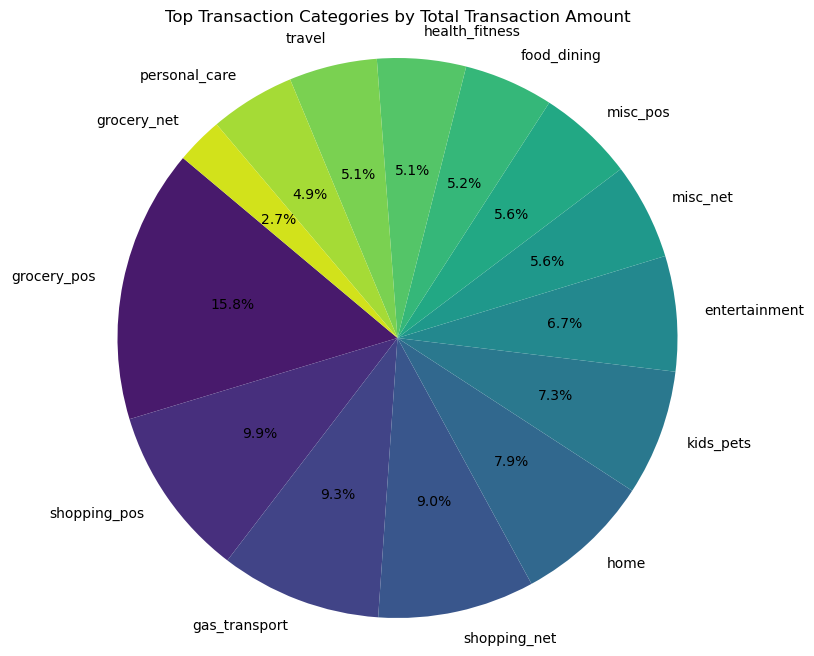

In [23]:
# Aggregate total transaction amount by category
category_amounts = cleaned_df.groupby('Transaction_Category')['Amount'].sum().reset_index()

# Sort categories by total amount in descending order
category_amounts = category_amounts.sort_values(by='Amount', ascending=False)

# Plotting the top transaction categories by total transaction amount
plt.figure(figsize=(10, 8))
plt.pie(category_amounts['Amount'], labels=category_amounts['Transaction_Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_amounts)))
plt.title('Top Transaction Categories by Total Transaction Amount')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### 7. Which gender tends to be associated with more fraudulent transactions in the dataset?

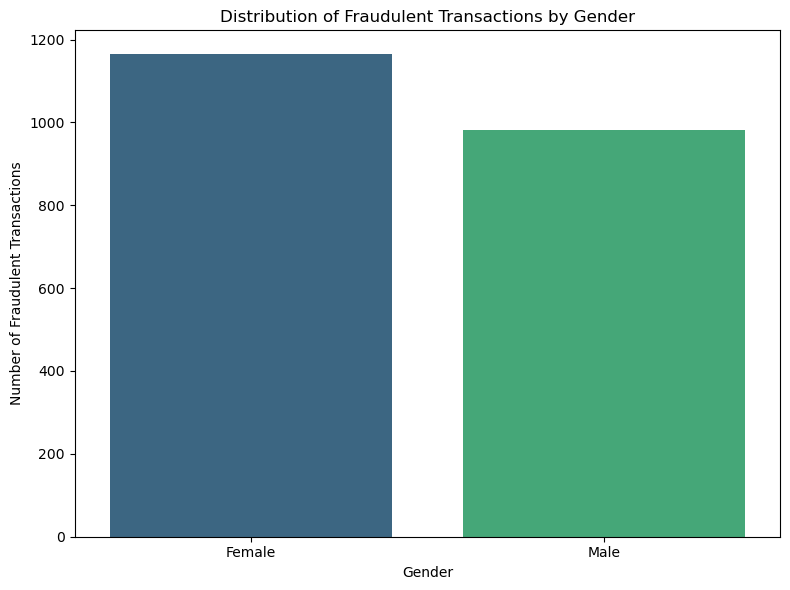

In [24]:
# Filter for fraud transactions
fraud_df = cleaned_df[cleaned_df['Fraud_Indicator'] == 1]

# Count fraud transactions by gender_encoded
fraud_gender_counts = fraud_df['gender_encoded'].value_counts().reset_index()
fraud_gender_counts.columns = ['Gender', 'Number of Fraudulent Transactions']

# Map gender codes to readable labels
fraud_gender_counts['Gender'] = fraud_gender_counts['Gender'].map({0: 'Male', 1: 'Female'})

# Plotting the distribution of fraudulent transactions by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Number of Fraudulent Transactions', data=fraud_gender_counts, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Gender')
plt.tight_layout()
plt.show()


### 8. How does the frequency of fraudulent transactions vary between weekdays and weekends?

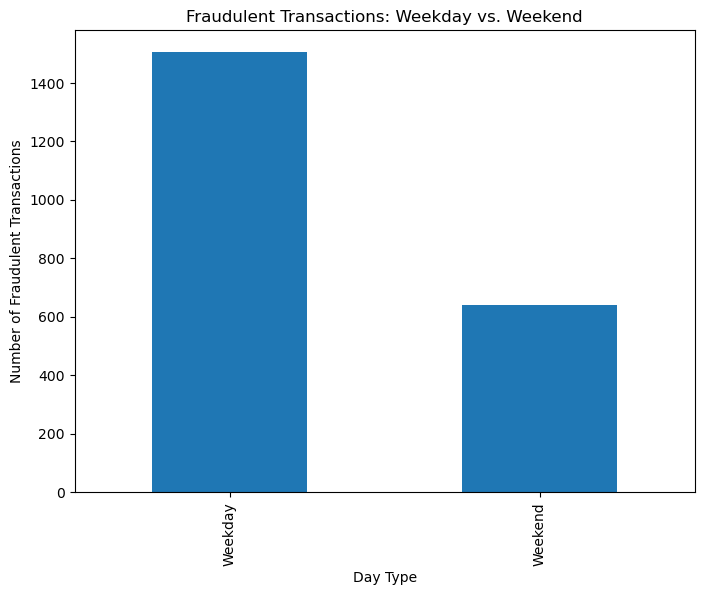

In [32]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['Day_of_Week'] = df['Transaction_DateTime'].dt.dayofweek

# Categorize as weekday or weekend
df['Day_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Filter for fraudulent transactions
fraud_df = df[df['Fraud_Indicator'] == 1]

# Count fraudulent transactions by day of the week
fraud_count_by_day = fraud_df['Day_of_Week'].value_counts().sort_index()

# Count fraudulent transactions by day type (weekday vs. weekend)
fraud_count_by_day_type = fraud_df['Day_Type'].value_counts()
# Plot fraudulent transactions by day type (weekday vs. weekend)
plt.figure(figsize=(8, 6))
fraud_count_by_day_type.plot(kind='bar')
plt.title('Fraudulent Transactions: Weekday vs. Weekend')
plt.xlabel('Day Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


### 9. At what times of the day are fraudulent transactions most likely to occur?

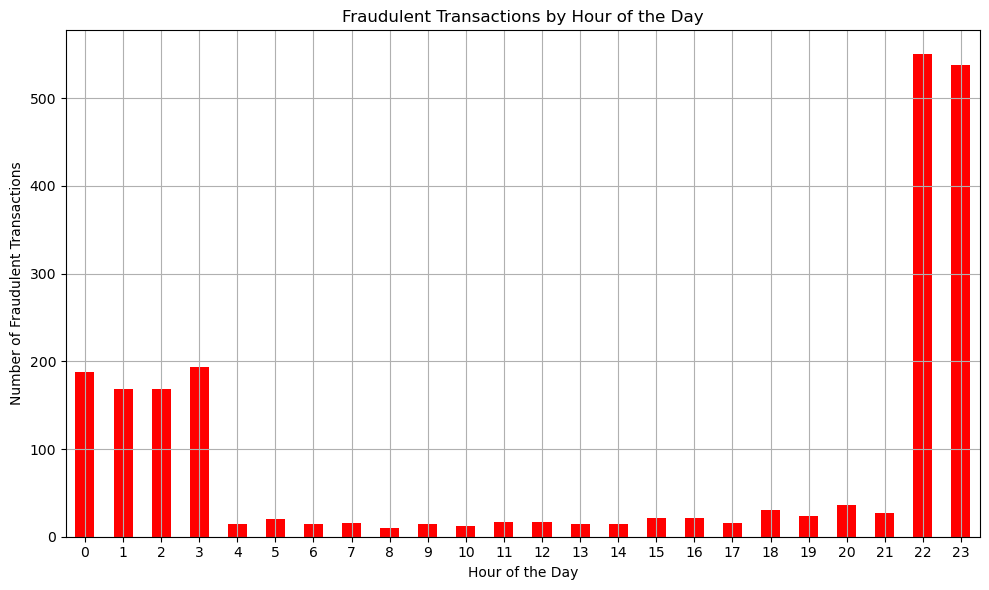

In [39]:
# Extract hour of the day from transaction datetime
df['Hour'] = df['Transaction_DateTime'].dt.hour

# Group by hour and count fraudulent transactions
fraud_count_by_hour = df[df['Fraud_Indicator'] == 1].groupby('Hour').size()

# Plotting
plt.figure(figsize=(10, 6))
fraud_count_by_hour.plot(kind='bar', color='red')
plt.title('Fraudulent Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()